[4.741494561013635, 1.3455734190842508, -2.3873836114654843, 2.237083602376602, -2.0852357734780353, -2.479139647087173, -2.916868948078637, -1.8282375104853248, -3.4394712225601225, 1.263280302841233]
[3.5706442738418147, -3.0656122362760794, -2.568068810740603, -2.098898473235116, 0.5628788713827468, 4.861633577635269, -2.281968082741841, -3.563364703711649, 2.9047541079064434, 3.396824422488935]
[23.922433729452763, 1.344350868044597, -5.882672624398617, 2.3181296169220675, 3.9517457623203383, 15.274051909657869, -8.566948363065464, -9.010840739989446, 6.880479921801626, 18.223370989944343]
solution:
1.900192 x + 2.907528 y + 5.400056 = z
4.741494561013635
1.3455734190842508
-2.3873836114654843
2.237083602376602
-2.0852357734780353
-2.479139647087173
-2.916868948078637
-1.8282375104853248
-3.4394712225601225
1.263280302841233


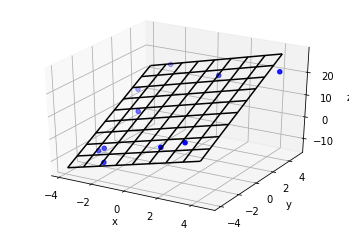

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

N_POINTS = 10
TARGET_X_SLOPE = 2
TARGET_y_SLOPE = 3
TARGET_OFFSET  = 5
EXTENTS = 5
NOISE = 1

# create random data
xs = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
ys = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
zs = []
for i in range(N_POINTS):
    zs.append(xs[i]*TARGET_X_SLOPE + \
              ys[i]*TARGET_y_SLOPE + \
              TARGET_OFFSET + np.random.normal(scale=NOISE))
    
print(xs)
print(ys)
print(zs)

# plot raw data
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='b')

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)

# Manual solution
fit = (A.T * A).I * A.T * b
errors = b - A * fit
residual = np.linalg.norm(errors)

# Or use Scipy
# from scipy.linalg import lstsq
# fit, residual, rnk, s = lstsq(A, b)

print('solution:')
print('%f x + %f y + %f = z' % (fit[0], fit[1], fit[2]))

for point in xs:
    print(point)
#print "errors:"
#print errors
#print "residual:"
#print residual

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()